Set DATE-AVG to '2025-05-06T16:39:46.010' from MJD-AVG.
Set DATE-END to '2025-05-06T16:41:49.483' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271880 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441530.624 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


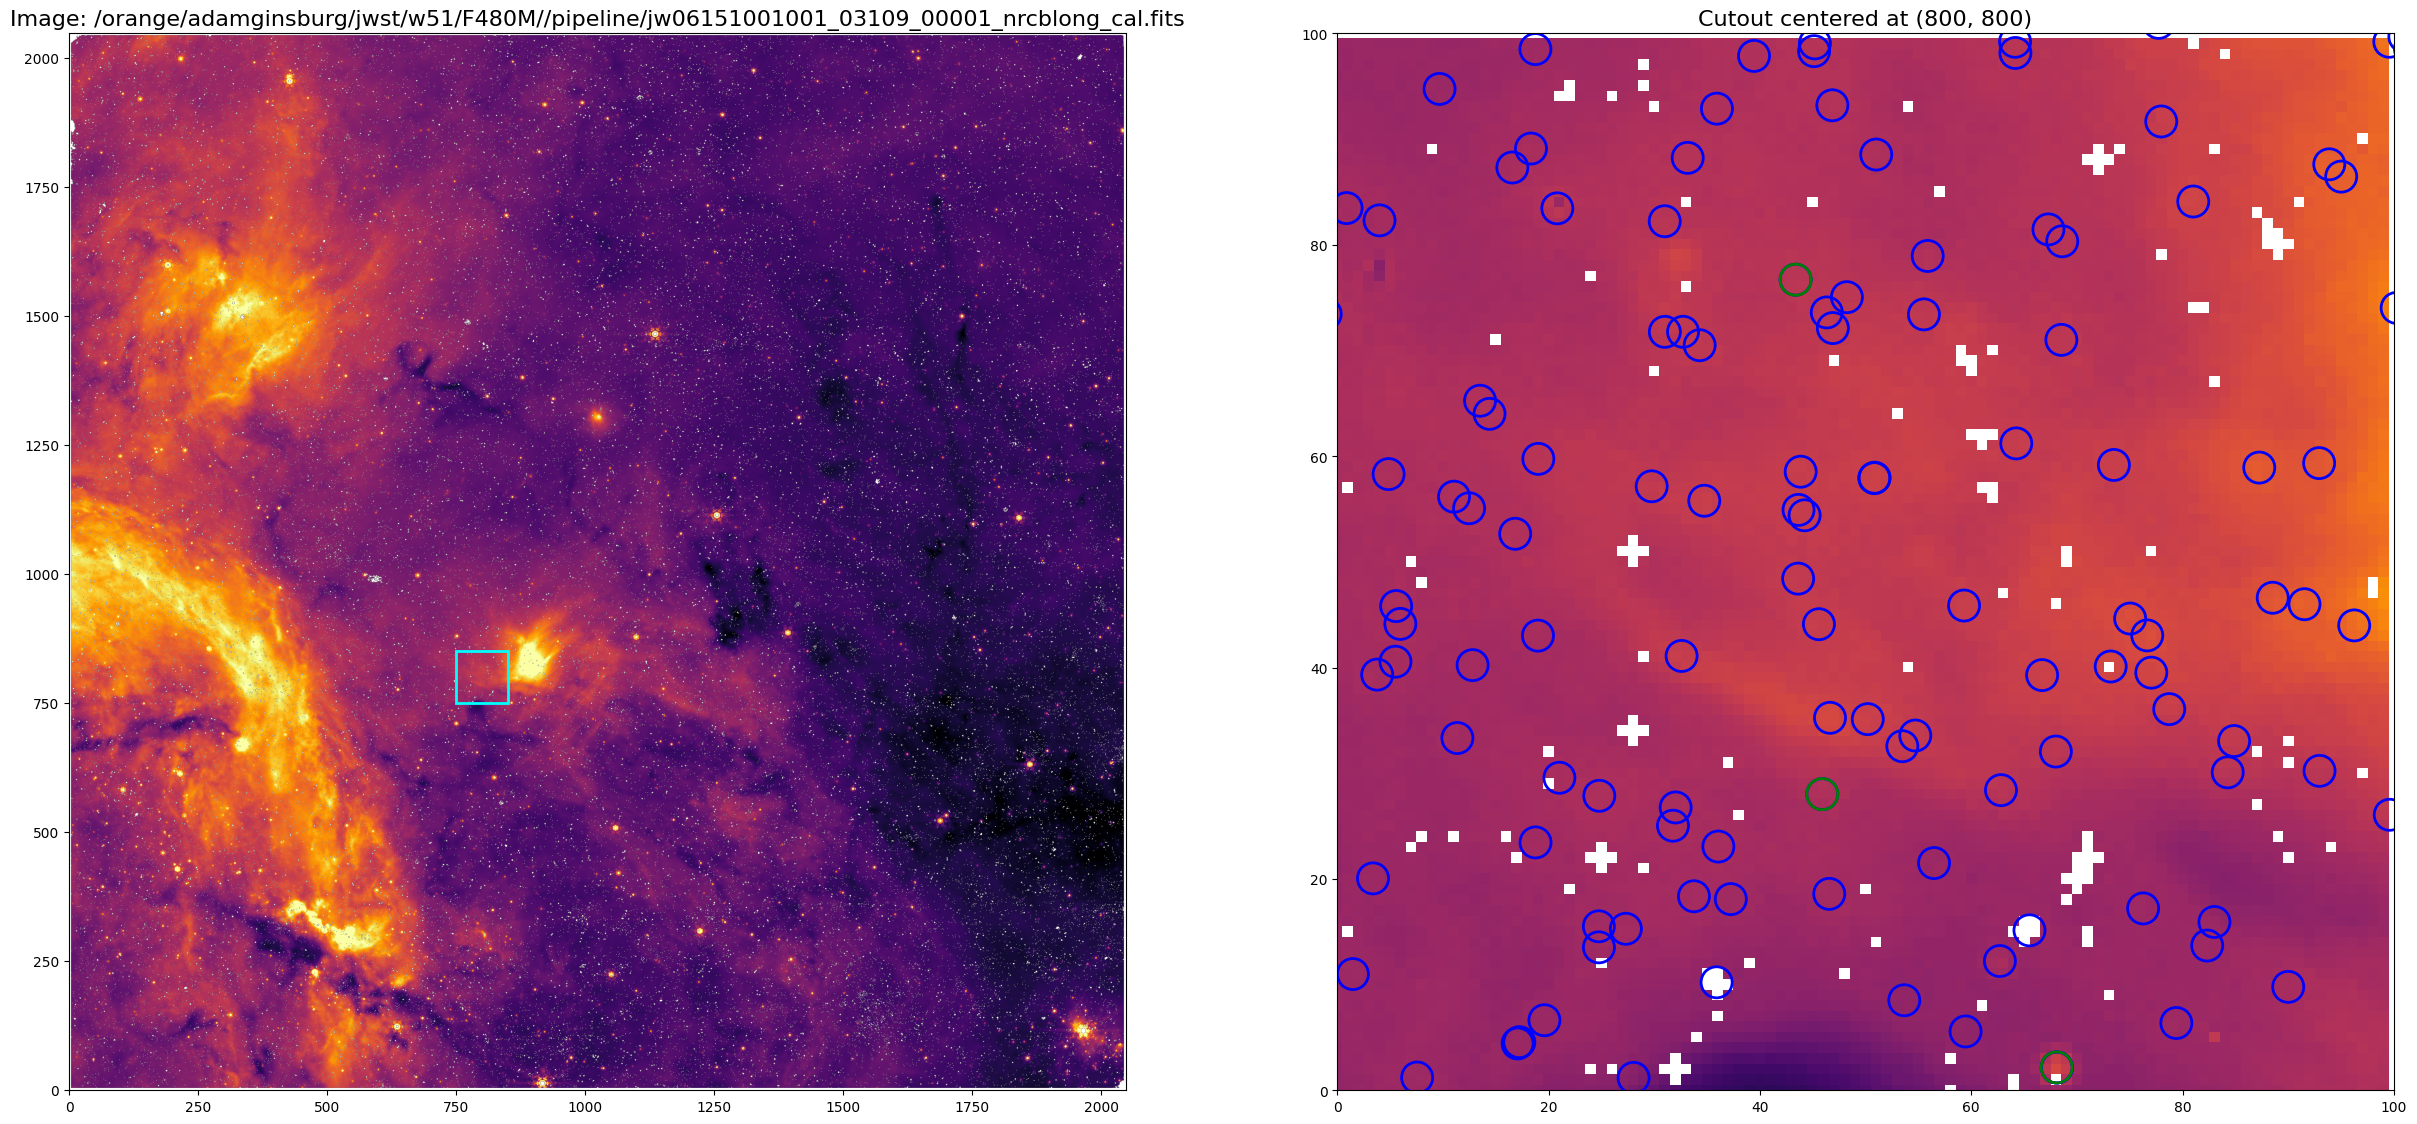

In [4]:
import glob
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
import numpy as np
from jwst.datamodels import dqflags
from scipy.ndimage import label, find_objects, center_of_mass, sum_labels


def main(xpos, ypos, size=100, filter='f480m', module='nrcblong', vgroup='3109', expnum='00001' ):
    #jw06151001001_03109_00007_nrcblong_cal.fits
    imgdir = f'/orange/adamginsburg/jwst/w51/{filter.upper()}/'
    img_filename = imgdir + '/pipeline/'+f'jw06151001001_0{vgroup}_{expnum}_{module}_cal.fits'
    img = fits.open(img_filename)

    fig = plt.figure(figsize=(30,15))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    wcs_img = WCS(img[1].header)
    norm = simple_norm(img[1].data, 'sqrt', percent=99.5)
    ax1.imshow(img[1].data, norm=norm, origin='lower', cmap='inferno')
    square = plt.Rectangle((xpos - size/2, ypos - size/2), size, size, edgecolor='cyan', facecolor='none', lw=2)
    ax1.add_patch(square)
    ax1.set_title(f'Image: {img_filename}', fontsize=16)
    # f480m_nrcb_visit001_vgroup3109_exp00007_daophot_basic.fits
    wav = int(filter.lower()[1:4])
    if wav > 300:
        module2 = module[:-4]  #nrca or nrcb
    else:
        module2 = module
    cat_basic_filename = imgdir + f'{filter.lower()}_{module2}_visit001_vgroup{vgroup}_exp{expnum}_daophot_basic.fits'
    cat_refined_filename = imgdir + f'{filter.lower()}_{module2}_visit001_vgroup{vgroup}_exp{expnum}_daophot_refined.fits'

    #jw06151001001_03109_00007_nrcblong_align_o001_crf_satstar_catalog_newnewnewnew.fits
    sat_cat_filename = imgdir + '/pipeline/' f'jw06151001001_0{vgroup}_{expnum}_{module}_align_o001_crf_satstar_catalog_newnewnewnew.fits'

    cutout_xmin = int(xpos - size/2)
    cutout_xmax = int(xpos + size/2)
    cutout_ymin = int(ypos - size/2)
    cutout_ymax = int(ypos + size/2)
    cutout = img[1].data[cutout_ymin:cutout_ymax, cutout_xmin:cutout_xmax]
    ax2.imshow(cutout, norm=norm, origin='lower', cmap='inferno')
    ax2.set_title(f'Cutout centered at ({xpos}, {ypos})', fontsize=16)
    
    cat_basic = Table.read(cat_basic_filename)
    cat_refined = Table.read(cat_refined_filename)
    sat_cat = Table.read(sat_cat_filename)

    xpos_basic = cat_basic['x_fit']
    ypos_basic = cat_basic['y_fit']
    xpos_refined = cat_refined['x_fit']
    ypos_refined = cat_refined['y_fit']

    xpos_sat = sat_cat['x_fit']
    ypos_sat = sat_cat['y_fit']

    ax2.scatter(xpos_basic-cutout_xmin, ypos_basic-cutout_ymin, s=500, edgecolor='blue', facecolor='none', label='Basic Catalog', lw=2)
    ax2.scatter(xpos_refined-cutout_xmin, ypos_refined-cutout_ymin, s=500, edgecolor='green', facecolor='none', label='Refined Catalog', lw=2)
    ax2.scatter(xpos_sat-cutout_xmin, ypos_sat-cutout_ymin, s=500, edgecolor='red', facecolor='none', label='Saturated Stars Catalog', lw=2)
    ax2.set_xlim(0, size)
    ax2.set_ylim(0, size)

main(800,   800, size=100, filter='f480m', module='nrcblong', vgroup='3109', expnum='00001' )   


